In [13]:
IMPORTING LIBRARIES:

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
DATASET UPLOAD:

In [6]:
diabetes_df = pd.read_csv('C:\\Users\\HP\\Downloads\\archive (1)\\diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
EXPLORATORY DATA ANALYSIS:

In [7]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
INFORMATION ABOUT DATASET:

In [15]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
CHECKING THE NULL VALUES IN DATASET:

In [11]:
diabetes_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [22]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
n the provided code snippet, the initial step involves checking for null values using the isnull() function, followed by calculating the sum of those missing values using the sum() function. However, this analysis may not accurately reflect the presence of missing data in the dataset. In reality, the dataset contains missing values represented by 0. To address this issue and ensure the dataset's authenticity, the subsequent step involves replacing these 0 values with NaN before initiating the imputation process.

In [23]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df_copy = diabetes_df.copy(deep=True)

# Replace 0 with NaN in specified columns
diabetes_df_copy[columns_to_replace] = diabetes_df_copy[columns_to_replace].replace(0, np.NaN)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
DATA VISUALIZATION:

In [ ]:
DATA DISTRIBUTION PLOTS BEFORE REMOVING THE NULL VALUES :

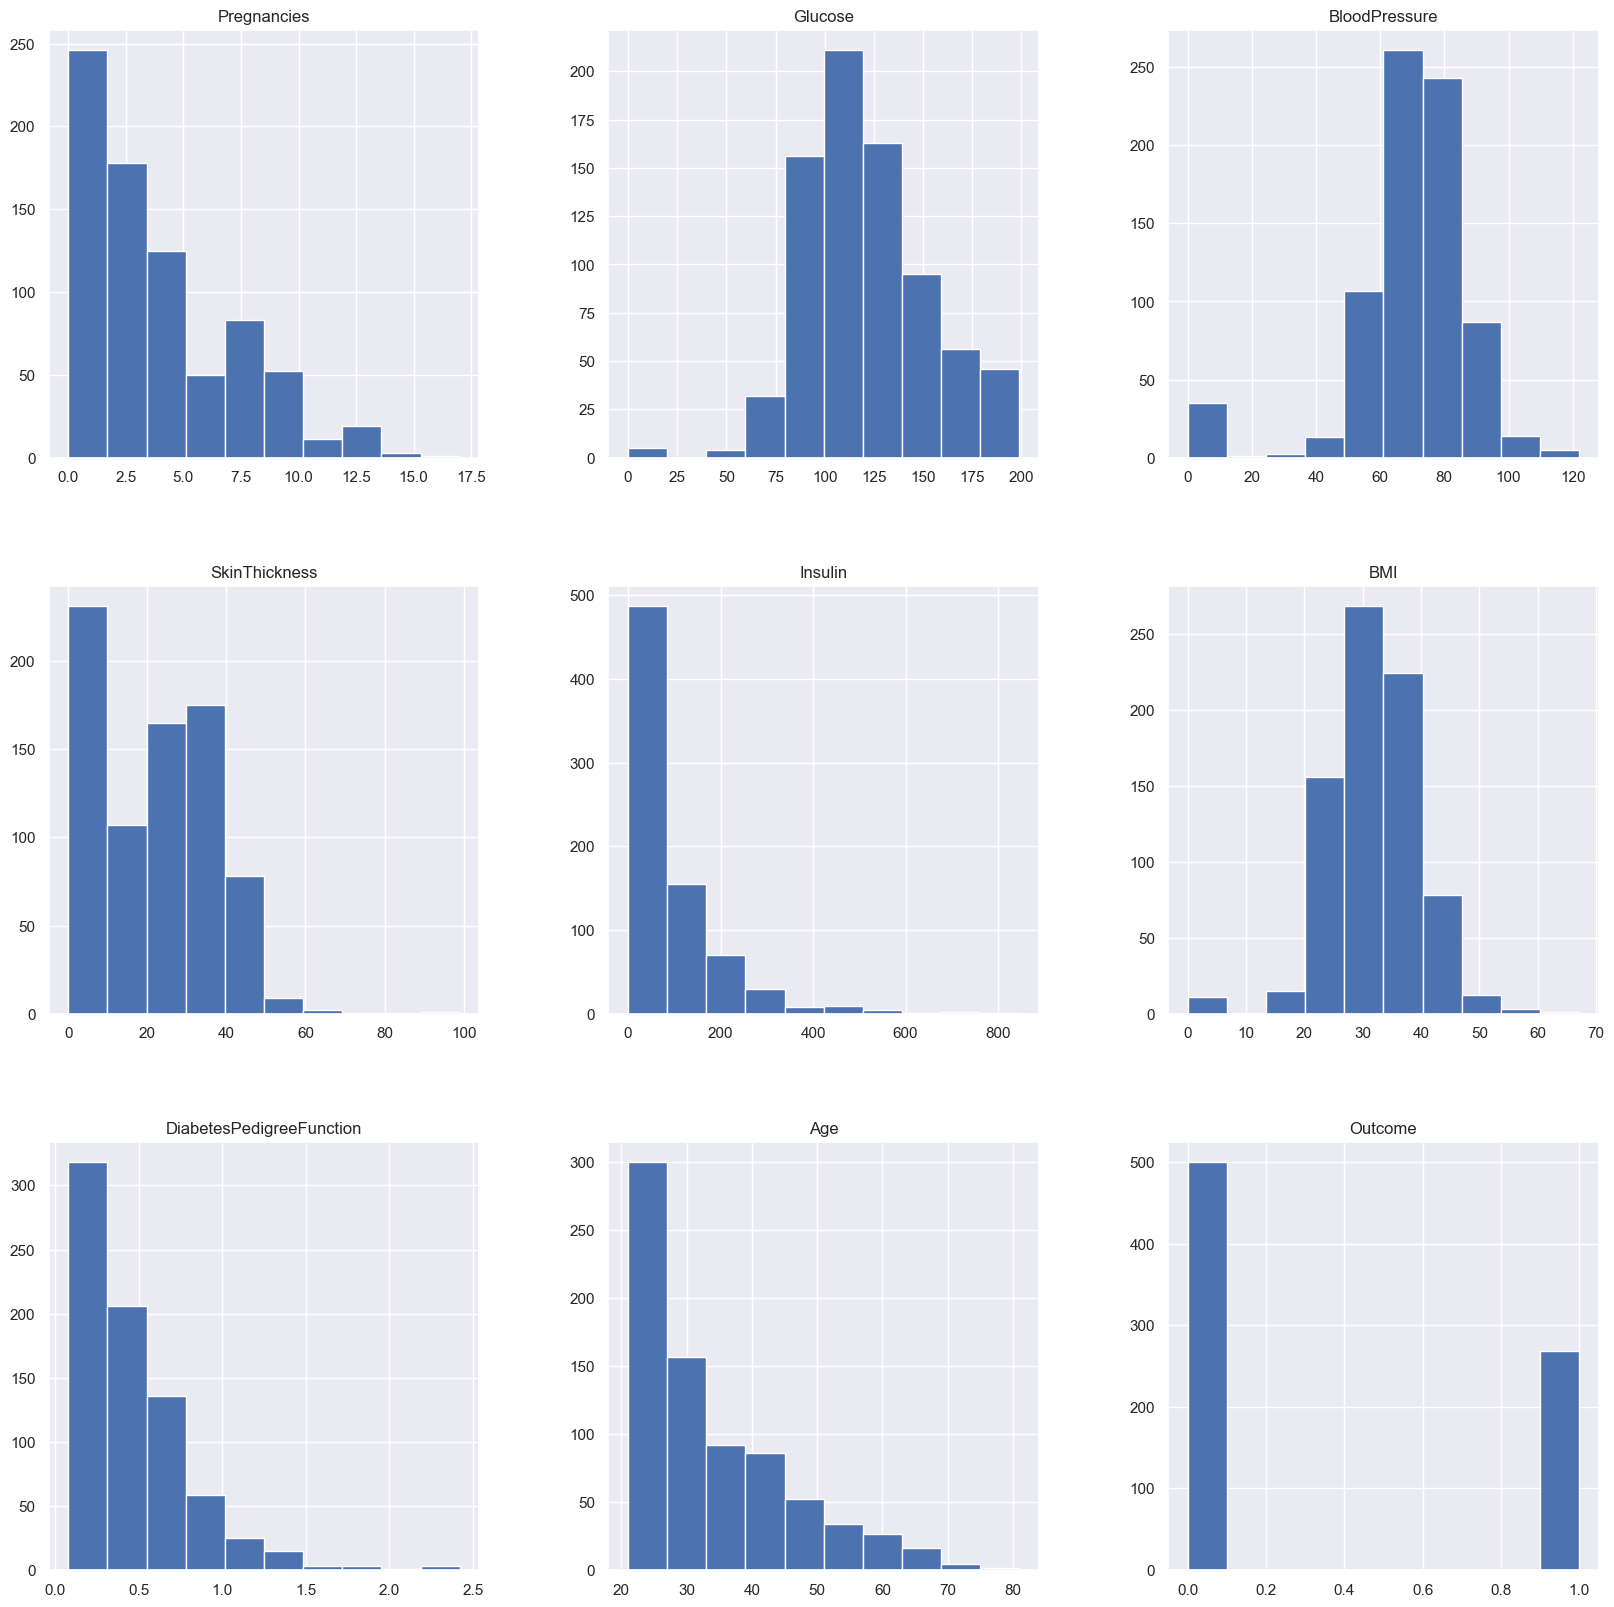

In [26]:
p = diabetes_df.hist(figsize = (20,20))

In [ ]:
Now we will be imputing the mean value of the column to each missing value of that particular column.

In [27]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

In [ ]:
DATA DISTRIBUTION PLOTS AFTER REMOVING THE NULL VALUES:

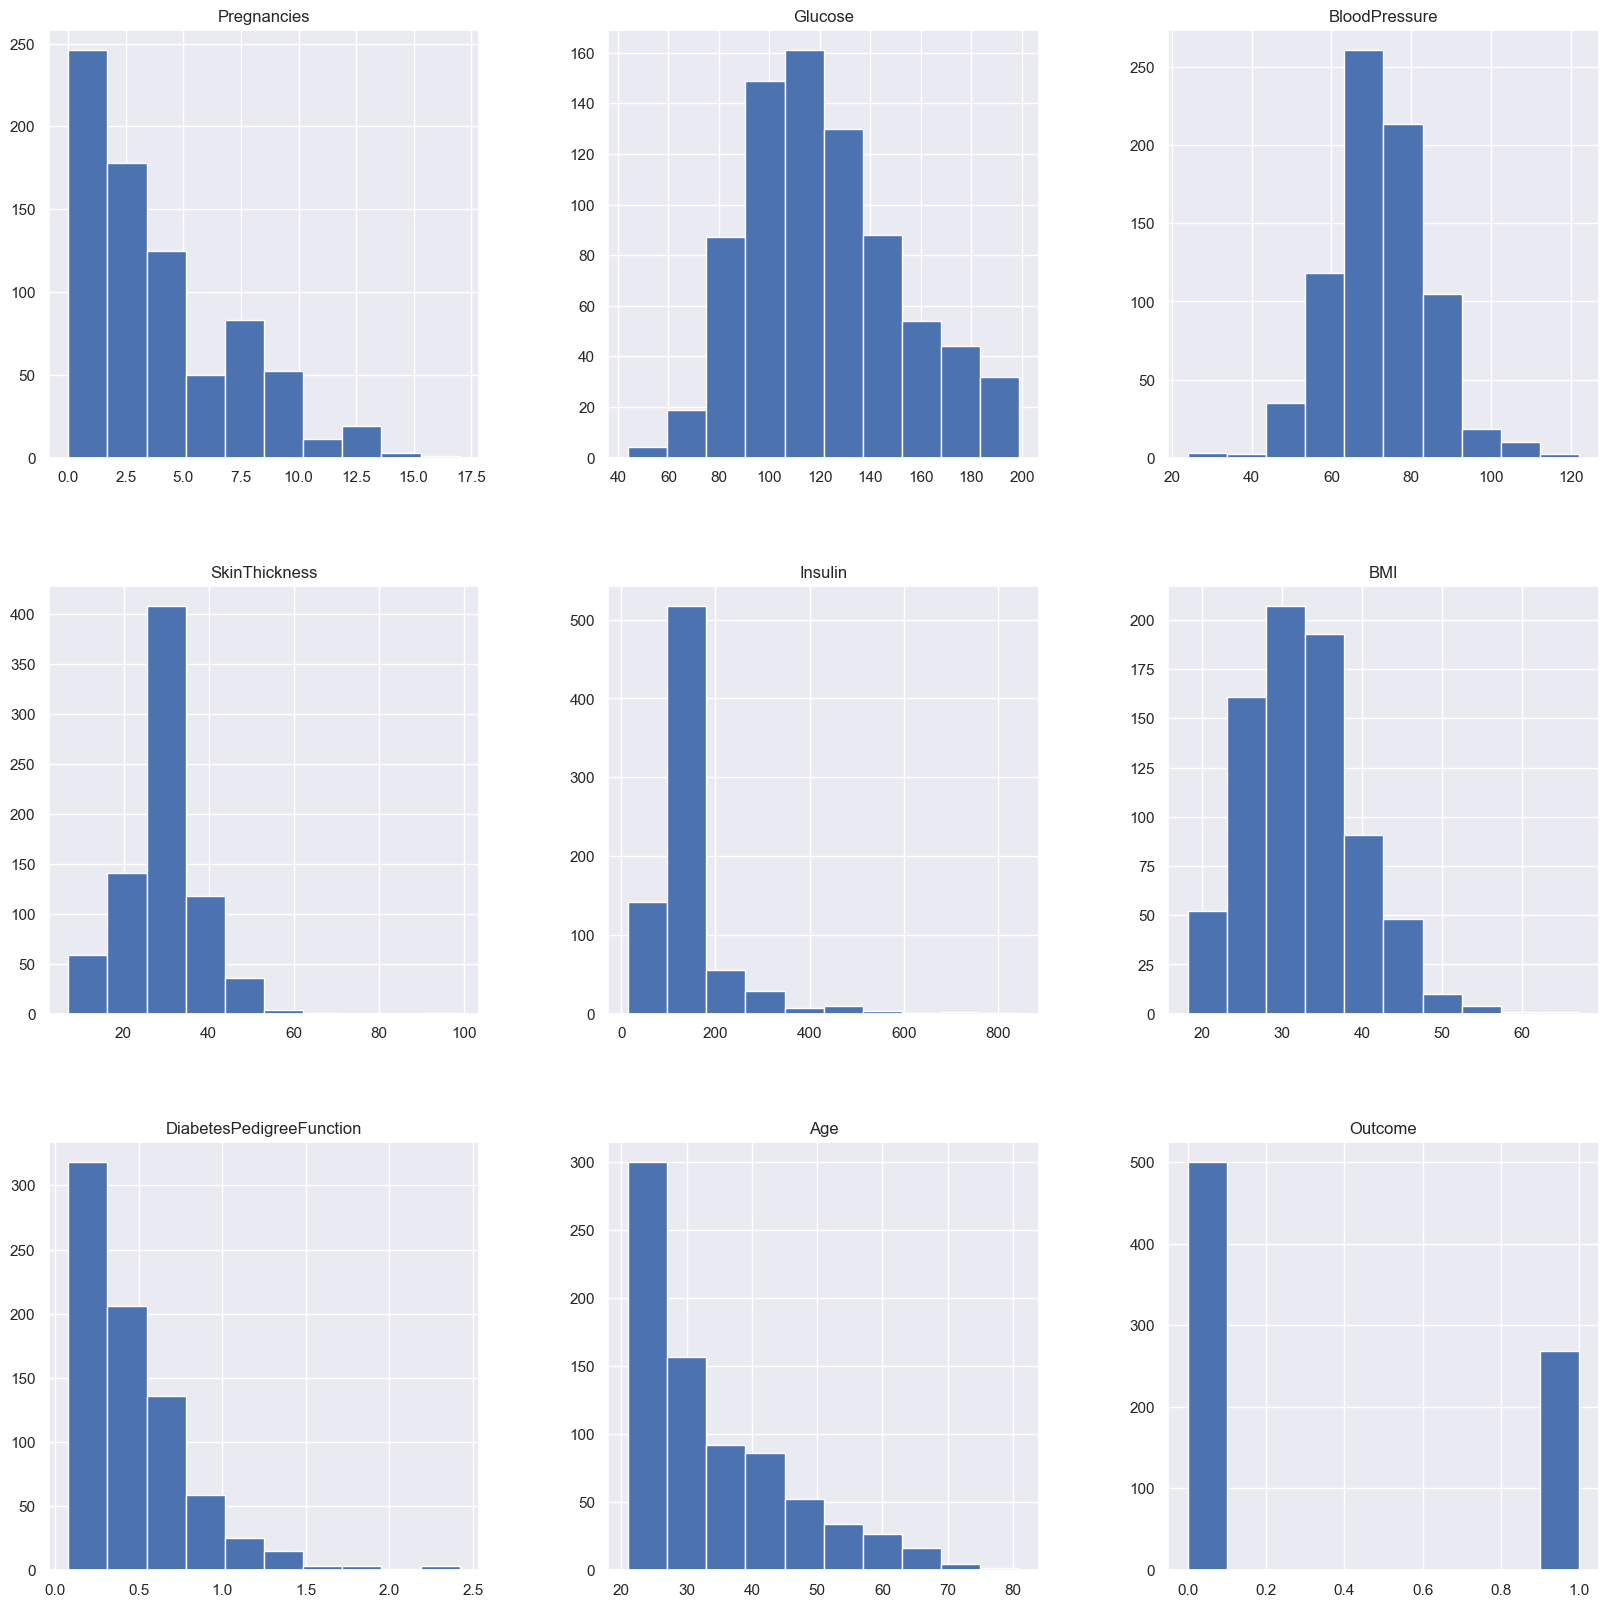

In [28]:
p = diabetes_df_copy.hist(figsize = (20,20))

In [ ]:
FEATURES CORRELATION:

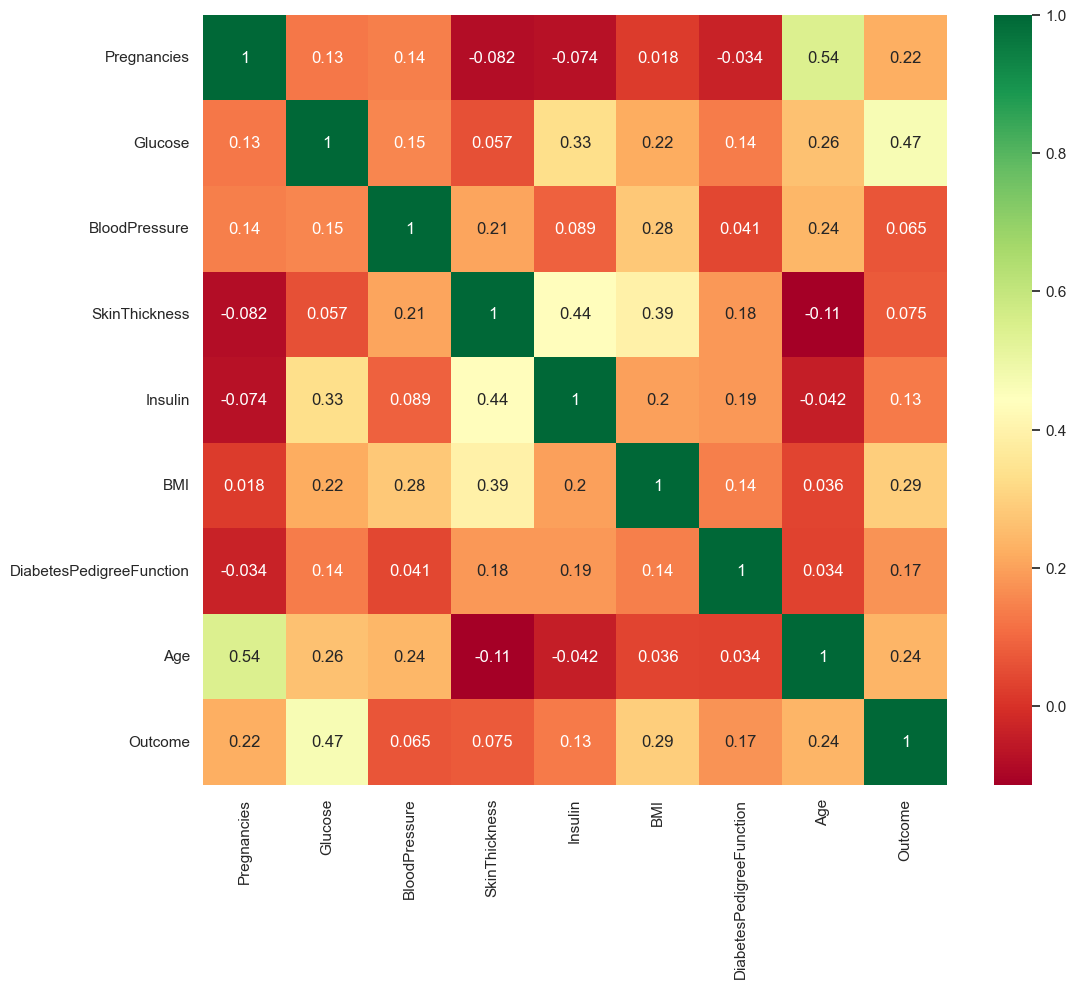

In [30]:
plt.figure(figsize=(12, 10))
correlation_matrix = diabetes_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
DATA SCALING:

In [ ]:
Let's check the data before scaling it

In [31]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
AFTER STANDARD SCALING:

In [32]:
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy[columns_to_scale]), columns=columns_to_scale)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
DATA SPLITTING:

In [34]:
# Specify the features and target variable
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Perform the train-test split
random_state_value = 7  # You can change this value if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state_value)

In [ ]:
MODEL BUILDING USING ML ALGORITHMS:

In [ ]:
RANDOM FOREST:

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Specify the number of estimators
n_estimators_value = 200

# Create and train the RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=n_estimators_value)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
CHECKING THE ACCURACY SCORE ON TRAINING SET:

In [36]:
# Predict on the training set
rfc_train = rfc.predict(X_train)

# Calculate and print the accuracy score
accuracy_score_train = metrics.accuracy_score(y_train, rfc_train)
print("Accuracy_Score =", format(accuracy_score_train))

Accuracy_Score = 1.0


In [ ]:
CHECKING THE ACCURACY SCORE ON TESTING SET:

In [37]:
# Predict on the test set
predictions = rfc.predict(X_test)

# Calculate and print the accuracy score
accuracy_score_test = metrics.accuracy_score(y_test, predictions)
print("Accuracy_Score =", format(accuracy_score_test))

Accuracy_Score = 0.7677165354330708


In [ ]:
CLASSIFICATION REPORT & CONFUSION MATRIX:

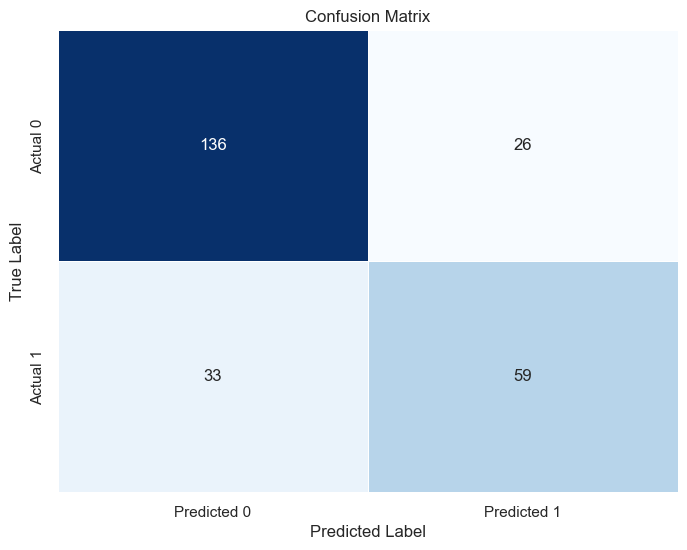

In [40]:
# Assuming 'y_test' contains the true labels and 'predictions' contains the predicted labels
cm = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       162
           1       0.69      0.64      0.67        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.76      0.77      0.77       254



In [ ]:
DECISION TREE:

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
CHECKING THE ACCURACY SCORE ON TESTING SET:

In [43]:
# Predict on the test set
predictions = dtree.predict(X_test)

# Calculate and print the accuracy score
accuracy_score_test = metrics.accuracy_score(y_test, predictions)
print("Accuracy Score =", format(accuracy_score_test))

Accuracy Score = 0.7007874015748031


In [ ]:
CLASSIFICATION REPORT & CONFUSION MATRIX:

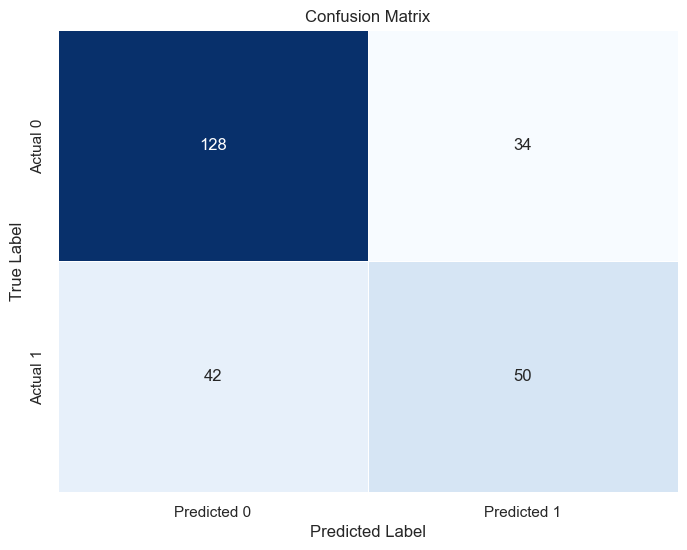

In [44]:
# Assuming 'y_test' contains the true labels and 'predictions' contains the predicted labels
cm = confusion_matrix(y_test, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [45]:
from sklearn.metrics import classification_report

# Assuming 'y_test' contains the true labels and 'predictions' contains the predicted labels
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       162
           1       0.60      0.54      0.57        92

    accuracy                           0.70       254
   macro avg       0.67      0.67      0.67       254
weighted avg       0.70      0.70      0.70       254



In [ ]:
SUPPORT VECTOR MACHINE (SVM):

In [49]:
from sklearn.svm import SVC
from sklearn import metrics

# Assuming 'X_test' contains the testing features
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [50]:
# Predict on the test set
svc_pred = svc_model.predict(X_test)

# Calculate and print the accuracy score
accuracy_score_svc = metrics.accuracy_score(y_test, svc_pred)
print("Accuracy Score =", format(accuracy_score_svc))

Accuracy Score = 0.7480314960629921


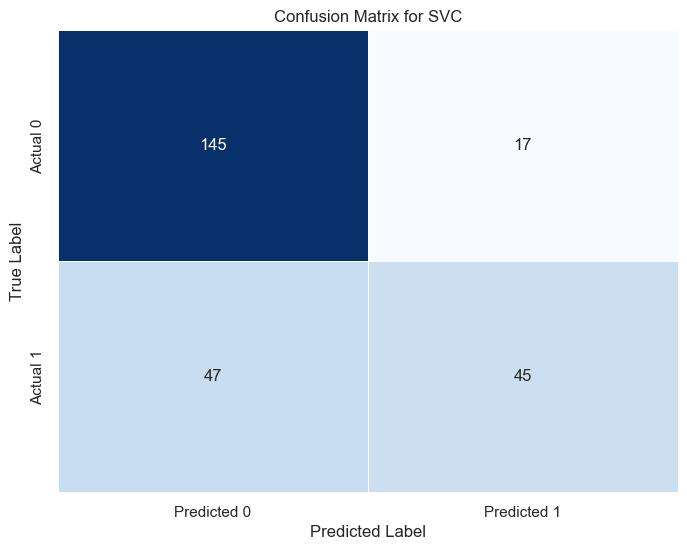

In [51]:
# Assuming 'y_test' contains the true labels and 'svc_pred' contains the predicted labels
cm_svc = confusion_matrix(y_test, svc_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVC')
plt.show()

In [52]:
from sklearn.metrics import classification_report

# Assuming 'y_test' contains the true labels and 'svc_pred' contains the predicted labels
print("Classification Report for SVC:\n", classification_report(y_test, svc_pred))

Classification Report for SVC:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



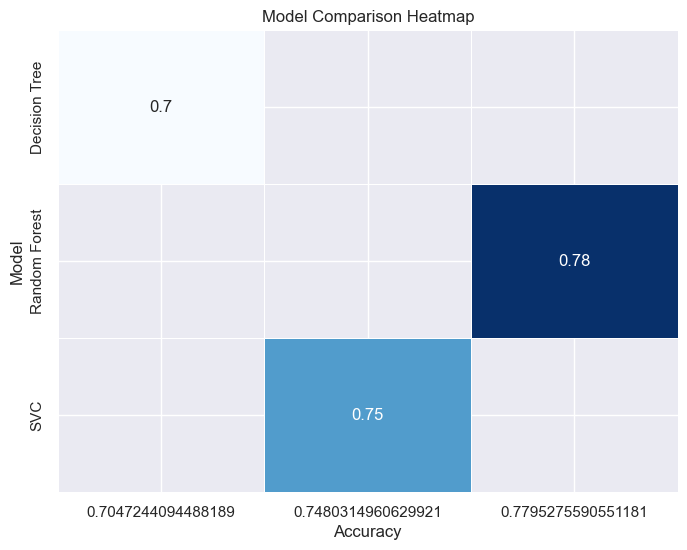

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'X' contains features and 'y' contains the target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
predictions_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, predictions_rfc)

# Train Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, predictions_dtree)

# Train Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
predictions_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, predictions_svc)

# Create a dataframe for model comparison
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'SVC'],
    'Accuracy': [accuracy_rfc, accuracy_dtree, accuracy_svc]
})

# Plot a heatmap for model comparison
plt.figure(figsize=(8, 6))
sns.heatmap(model_comparison.pivot(index='Model', columns='Accuracy', values='Accuracy'),
            annot=True, cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Comparison Heatmap')
plt.show()